<font size="2">src: [Machine Learning Tutorial Python](https://www.youtube.com/watch?v=gmvvaobm7eQ) by Dhaval Patel</font>
---
---

## Requirements
---
---

In [63]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import tree, svm
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.datasets import load_digits, load_iris
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

## Linear Regression
---
---
Predicting a continous value based on a single input value
- Utilises a linear function: $ y = m*x + b $
    - `y = target value`
    - `m = slope `
    - `x = argument` 
    - `b = interception with y-axis`

In [2]:
path = os.path.join("data", "linear_regression_data.csv")
# loading the data
df = pd.read_csv(path)
# display the numeric data
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


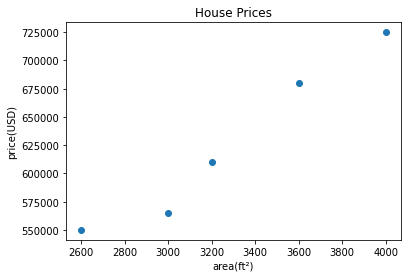

In [3]:
# explore data visually
# %matplotlib inline
plt.xlabel("area(ft²)")
plt.ylabel("price(USD)")
plt.title("House Prices")
plt.scatter(df.area, df.price)

In [4]:
# initializing the model
model = LinearRegression()
# pass data and train the mode, NOTE: first argument is expected to be a column vector, hence the different approaches to value retrieval, 
# the "values" method omits the header of the dataframe
model.fit(df[["area"]].values, df.price)
# use model to predict price (y) for a list of arguments (area (X))
X = np.array([[1000], [2000], [9001]])
model.predict(X)

array([ 316404.10958904,  452191.78082192, 1402841.26712329])

y = f(x)
y = m * x + b 
y = 135.78767123287673 * x + 180616.43835616432


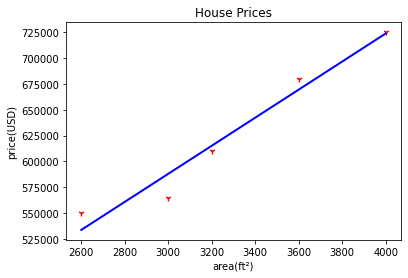

In [5]:
# display function graph (y = m*x + b) with the minimal distance to all samples, 
print("y = f(x)")
print("y = m * x + b", "\ny =", model.coef_[0], "* x +", model.intercept_)
plt.xlabel("area(ft²)")
plt.ylabel("price(USD)")
plt.title("House Prices")
plt.scatter(df.area, df.price, color = "red", marker = "1")
plt.plot(df.area, model.predict(df[["area"]].values), color = "blue", linewidth = 2)

## Multivariable Linear Regression
---
---
Predicting a continous value based on multiple input values
- Utilises a function of this shape: $ y = m1*x1 + m2*x2 + m3*x3 + ... + b $
    - `y = target value`
    - `m = factors`
    - `x = arguments` 
    - `b = interception with y-axis`

In [6]:
path = os.path.join("data", "multivariate_regression_data.csv")
# loading the data
df = pd.read_csv(path)
# display the numeric data
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,596000
4,4000,5.0,8,760000


In [7]:
# handling NaN by averaging present values
df.bedrooms = df.bedrooms.fillna(df.bedrooms.median())
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,3.5,18,610000
3,3600,3.0,30,596000
4,4000,5.0,8,760000


In [8]:
# initializing the model
model = LinearRegression()
# passing the independent variables (factors of m1, m2, m3) to the model and start training 
# price (dependent variable) = m1*area + m2*bedrooms + m3*age + b
# b = interception with y-axis 
model.fit(df[["area", "bedrooms", "age"]].values, df.price)

LinearRegression()

In [9]:
# displaying m1, m2, m3 and interception with y-axis
print(model.coef_, model.intercept_)

[    198.56145032 -116060.587035    -14172.18646994] 652276.4087270447


In [10]:
# use model to predict price (y) for an array of arguments
area = 3000
bedrooms = 3
age = 40
features = np.array([[area, bedrooms, age]])
int(model.predict(features)[0])

332891

## Logistic Regression
---
---
Used for binary classification

- Utilises the logit function (aka sigmoid function): $ y = \frac{1}{1 + e^{-x}} $
    - `y = target value`
    - `e = Euler's number (2.71828...) -> base of natural logarithm`
    - `x = arguments` 
- Passes linear function into sigmoid function: $y = \frac{1}{1 + e^{-(m*x + b)}} $

In [11]:
path = os.path.join("data", "logistic_regression_data.csv")
# loading the data
df = pd.read_csv(path)
# display some of the numeric data
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


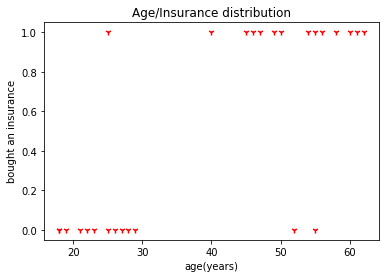

In [12]:
# explore data visually
plt.xlabel("age(years)")
plt.ylabel("bought an insurance")
plt.title("Age/Insurance distribution")
plt.scatter(df.age, df.bought_insurance, marker="1", color= "red")

In [13]:
# splitting Data into Training and test sets
X_train, X_test, y_train, y_test = train_test_split(df[['age']], df.bought_insurance, train_size = 0.9)

In [14]:
# initializing the model
model = LogisticRegression()
# pass data and train the model
model.fit(X_train, y_train)
# get prediction accuracy
model.score(X_test, y_test)

1.0

In [15]:
# shape = Customer-ID, age
print("Customer data yet unpredicted:\n", X_test, "\n")
# predict values for unknown data
print("Prediction:", model.predict(X_test), "\n")
# display probability for predicted value
print("Probability for given predictions:\n", model.predict_proba(X_test))

Customer data yet unpredicted:
     age
1    25
26   23
19   18 

Prediction: [0 0 0] 

Probability for given predictions:
 [[0.83307186 0.16692814]
 [0.86494507 0.13505493]
 [0.92276731 0.07723269]]


C:\Users\pompom\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


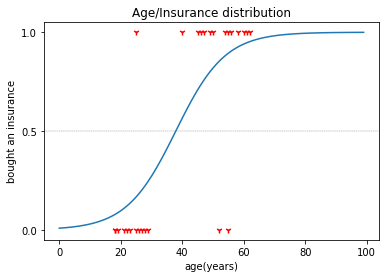

In [16]:
# Display the models internal sigmoid function together with data points
plt.yticks([0.0, 0.5, 1.0])  
plt.axhline(y=0.5, color='grey', linestyle='--', lw = 0.4)
plt.xlabel("age(years)")
plt.ylabel("bought an insurance")
plt.title("Age/Insurance distribution")
plt.scatter(df.age, df.bought_insurance, marker="1", color= "red")
plt.plot(
    # x values
    np.arange(0, 100, 1), 
    # using the models prediction on every age from 0 to 100 to plot the internal sigmoid function
    [y[1] for y in model.predict_proba(np.arange(0,100,1).reshape(100,1))]
    )

## Logistic Regression
---
---
Used for multiclass classification (handwritten digits in this case)

In [17]:
# load data (1797 samples, representing handwritten digits of 8x8 pixel as arrays of size 64)
digits = load_digits()
# get some info about the data format 
print(dir(digits))
print(type(digits))
# print first array
print(digits.data[0])

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']
<class 'sklearn.utils.Bunch'>
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


array([0, 1, 2])

<Figure size 432x288 with 0 Axes>

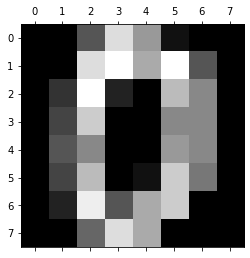

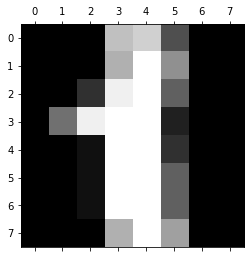

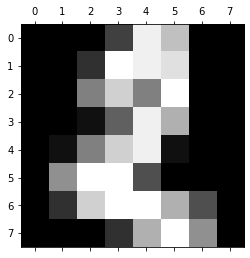

In [18]:
# display some digits
plt.gray()
for i in range(3):
    plt.matshow(digits.images[i])
# print corresponding labels
digits.target[:3]    

In [19]:
# splitting data into Training and Test sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, train_size = 0.8)

In [20]:
# initializing the model, to fix warning about convergence increase number of iterations (default is max_iter = 100)
model = LogisticRegression(max_iter=3100)
# pass data and train the model
model.fit(X_train, y_train)
# make a prediction on test set
predictions = model.predict(X_test)
print((predictions == y_test).sum(), "/", len(y_test), "samples correctly predicted")

349 / 360 samples correctly predicted


C:\Users\pompom\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(69.0, 0.5, 'Truth')

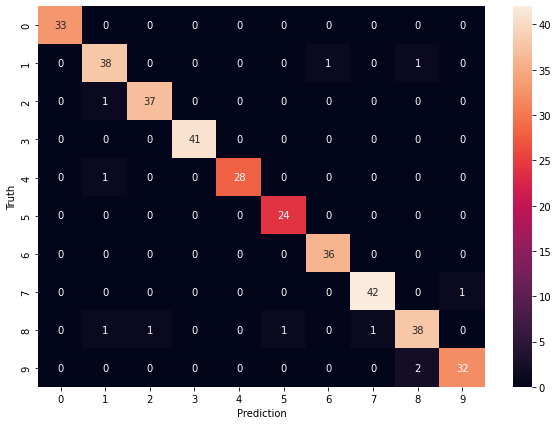

In [21]:
# print confusion matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)
plt.xlabel("Prediction")
plt.ylabel("Truth")

## Decision Tree
---
---
Used for classification

- Gains information by splitting data into mutual exclusive subsets based on feature (low entropy within a subset = high information gain)

In [22]:
path = os.path.join("data", "titanic.csv")
# loading the data
df = pd.read_csv(path)
# display some of the numeric data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
# discard unneeded data by creating a new dataframe
input_data = df.drop([
    "PassengerId", 
    "Name", 
    "Ticket", 
    "SibSp",
    "Parch",
    "Cabin",
    "Embarked"
    ], axis = "columns")
input_data.head(10)

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
5,0,3,male,NaN,8.4583
6,0,1,male,54.0,51.8625
7,0,3,male,2.0,21.0750
8,1,3,female,27.0,11.1333
9,1,2,female,14.0,30.0708


In [24]:
# cleaning the data of NaN
print(input_data[input_data["Age"].isna()].shape[0], "entries in this dataframe contained NaN, now replaced with age average")
input_data = input_data.fillna(input_data.Age.median())

177 entries in this dataframe contained NaN, now replaced with age average


In [25]:
# encode nominal features into numeric values
sex_encoder = LabelEncoder()
input_data["Sex"] = sex_encoder.fit_transform(input_data["Sex"])
# separating data and targets
targets, features = np.split(input_data, [1], axis = 1)
# converting targets from float into integer to avoid "Unknown label type: 'continuous-multioutput'" error
targets = targets.astype(int)

In [26]:
# splitting data into Training and Test sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, train_size = 0.8)

In [27]:
# initializing the model
model = tree.DecisionTreeClassifier()
# pass data and train the model
model.fit(X_train, y_train)
# get prediction accuracy
model.score(X_test, y_test)

0.8268156424581006

## Support Vector Machine (SVM)
---
---
- can be used for classification & regression; highly effective in high vector spaces (samples with many features)
- data points close to a separating margin (line, (hyper-)plane) are called *support vectors*
- **NOTE**: "The fit time scales at least quadratically with the number of samples and may be impractical beyond tens of thousands of samples." 
    - src: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html (accessed: 14.01.22)
---
some terminology:
- if data points are inseparable using a linear graph, new features can be introduced by transforming the existing data
    - e.g. if `x`, `y` are given features, `z = x² + y²` is a new dimension that could be used to separate the data, the function used for such a transformation is references as **kernel**
- **gamma**: "[...] controls the distance of influence of a single training point. Low values of gamma indicates a large similarity radius which results in more points being grouped together. For high values of gamma, the points need to be very close to each other in order to be considered in the same group (or class). Therefore, models with very large gamma values tend to overfit." src:https://towardsdatascience.com/hyperparameter-tuning-for-support-vector-machines-c-and-gamma-parameters-6a5097416167 (accessed: 21.01.22)
- **Regularization (C)**: "`C` parameter adds a penalty for each misclassified data point. If c is small, the penalty for misclassified points is low so a decision boundary with a large margin is chosen at the expense of a greater number of misclassifications. If `C` is large, SVM tries to minimize the number of misclassified examples due to high penalty which results in a decision boundary with a smaller margin." src: see above 

In [34]:
# load data
iris = load_iris()
# get some info about the data format 
print(dir(iris))
print(iris.feature_names)

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [41]:
# converting data set into pandas DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# appending DataFrame with target and -names as well
df["target"] = iris.target
df["name"] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


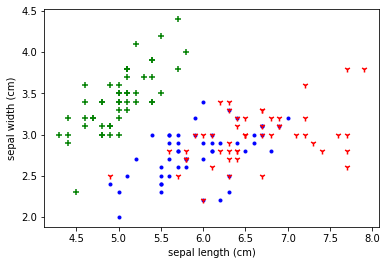

In [50]:
""" explore data visually """
# split data accordingly to class
df0 = df[df.target == 0]
df1 = df[df.target == 1]
df2 = df[df.target == 2]
# display different classes using two of the four attributes
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.scatter(df0["sepal length (cm)"], df0["sepal width (cm)"], color="green", marker="+")
plt.scatter(df1["sepal length (cm)"], df1["sepal width (cm)"], color="blue", marker=".")
plt.scatter(df2["sepal length (cm)"], df2["sepal width (cm)"], color="red", marker="1")

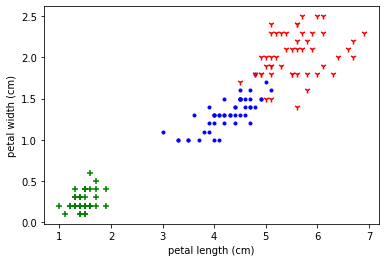

In [52]:
# display different classes using the two remaining attributes (other combinations are possible of course)
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.scatter(df0["petal length (cm)"], df0["petal width (cm)"], color="green", marker="+")
plt.scatter(df1["petal length (cm)"], df1["petal width (cm)"], color="blue", marker=".")
plt.scatter(df2["petal length (cm)"], df2["petal width (cm)"], color="red", marker="1")

In [53]:
# splitting data into Training and Test sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2)

In [56]:
# initializing the model
model = svm.SVC()
# pass data and train the model
model.fit(X_train, y_train)
# get prediction accuracy
model.score(X_test, y_test)

0.8666666666666667

In [64]:
# K-fold Cross Validation to manually explore different model configurations
print(np.average(cross_val_score(svm.SVC(kernel = "linear", C = 10, gamma = "auto"), X_train, y_train, cv = 5)))
print(np.average(cross_val_score(svm.SVC(kernel = "rbf", C = 10, gamma = "auto"), X_train, y_train, cv = 5)))
print(np.average(cross_val_score(svm.SVC(kernel = "linear", C = 20, gamma = "auto"), X_train, y_train, cv = 5)))

0.9666666666666668
0.9666666666666668
0.9583333333333334


In [68]:
# Exhaustive Hyperparameter Tuning using GridSearchCV
clf = GridSearchCV(
    # providing the model architecture
    svm.SVC(),
    # defining the parameter grid to test upon
    {
        "C" : [1, 10, 20],
        "kernel" : ["rbf", "linear"]
    },
    # number of cross validations
    cv = 5, 
    return_train_score = True
)

clf.fit(iris.data, iris.target)
results = pd.DataFrame(clf.cv_results_)
# discard most of the additional information obtained during this process
results[["param_C", "param_kernel", "mean_test_score"]]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.966667
1,1,linear,0.980000
2,10,rbf,0.980000
3,10,linear,0.973333
4,20,rbf,0.980000
5,20,linear,0.966667
